# TED Talks Recommendation System 📽️

This project uses natural language processing and similarity analysis to build a simple content-based TED Talk recommendation system. The dataset includes TED Talk titles, details, speaker names, and posting dates.

In addition to building a recommender system, this notebook also explores the dataset with visualizations to understand the most common themes and trends in TED Talks.


## Importing Libraries

In [2]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
warnings.filterwarnings('ignore')

## Loading the Dataset 📂

We load the TEDx dataset and preview the first few rows to understand its structure.


In [4]:
df = pd.read_csv("C:\\Users\\amita\\Downloads\\ml_project\\Ted_Talks_Recommendation_System_with_Machine_Learning-ipynb\\tedx_dataset.csv")
print(df.head())

                                idx       main_speaker  \
0  8d2005ec35280deb6a438dc87b225f89     Alexandra Auer   
1  b3072cd11f40eb57fd259555264476c6  Elizabeth Gilbert   
2  4adc9fee977fa04c357ed4c9b52aa3cc       Butterscotch   
3  59c641a72b495d522a7932145d6c02b3         Ethan Lisi   
4  d227f2faf6ec185e54436d86463f499b      Daniel Finkel   

                                               title  \
0                    The intangible effects of walls   
1  It's OK to feel overwhelmed. Here's what to do...   
2                                  "Accept Who I Am"   
3               What it's really like to have autism   
4              Can you solve the sea monster riddle?   

                                             details           posted  \
0  More barriers exist now than at the end of Wor...  Posted Apr 2020   
1  If you're feeling anxious or fearful during th...  Posted Apr 2020   
2  Firing off her formidable beatboxing skills, m...  Posted Apr 2020   
3  "Autism is not a di

In [7]:
df.columns

Index(['idx', 'main_speaker', 'title', 'details', 'posted', 'url',
       'num_views'],
      dtype='object')

## Dataset Shape 📊

We check the shape of the dataset to understand the number of rows and columns.


In [10]:
df.shape

(4467, 7)

## Checking for Missing Values ❓

We check for any missing values in the dataset to ensure data quality before further analysis.


In [13]:
df.isnull().sum()


idx                0
main_speaker       1
title              0
details            0
posted             0
url                0
num_views       4258
dtype: int64

In [15]:
# Extracting Year and Month
splitted = df['posted'].str.split(' ', expand=True)

# Creating columns for month and year of the talk
df['year'] = splitted[2].astype('int')
df['month'] = splitted[1]


## Talks per Year 📅

We visualize the number of TED Talks posted each year to analyze trends over time.


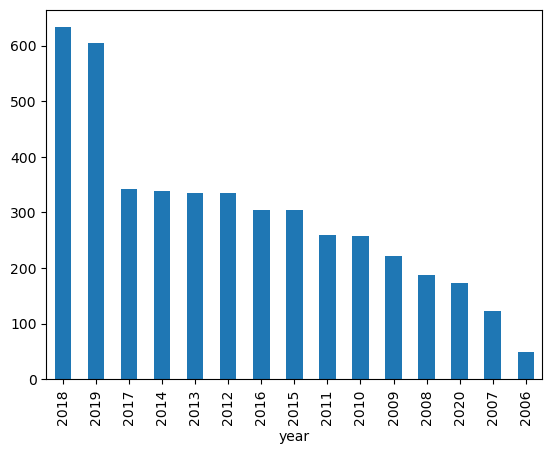

In [18]:
df['year'].value_counts().plot.bar()
plt.show()


In [19]:
# Let's combine the title and the details of the talk.
df['details'] = df['title'] + ' ' + df['details']

# Removing the unnecessary information
df = df[['main_speaker', 'details']]
df.dropna(inplace = True)
df.head()


,main_speaker,details
0,Alexandra Auer,The intangible effects of walls More barriers ...
1,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...
2,Butterscotch,"""Accept Who I Am"" Firing off her formidable be..."
3,Ethan Lisi,"What it's really like to have autism ""Autism i..."
4,Daniel Finkel,Can you solve the sea monster riddle? Accordin...


In [20]:
# We would like to have a copy of our data for future use.
data = df.copy()


## Removing Stopwords 🧹

We remove common stopwords from the details of the TED Talks to focus on the meaningful content.


In [25]:
def remove_stopwords(text):
  stop_words = stopwords.words('english')

  imp_words = []

  # Storing the important words
  for word in str(text).split():
    word = word.lower()

    if word not in stop_words:
      imp_words.append(word)

  output = " ".join(imp_words)

  return output

In [27]:
df['details'] = df['details'].apply(lambda text: remove_stopwords(text))
df.head()


,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed. here's next feeling anxio...
2,Butterscotch,"""accept am"" firing formidable beatboxing skill..."
3,Ethan Lisi,"really like autism ""autism disease; another wa..."
4,Daniel Finkel,"solve sea monster riddle? according legend, ev..."


In [28]:
punctuations_list = string.punctuation


def cleaning_punctuations(text):
	signal = str.maketrans('', '', punctuations_list)
	return text.translate(signal)


df['details'] = df['details'].apply(lambda x: cleaning_punctuations(x))
df.head()


,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed heres next feeling anxious...
2,Butterscotch,accept am firing formidable beatboxing skills ...
3,Ethan Lisi,really like autism autism disease another way ...
4,Daniel Finkel,solve sea monster riddle according legend ever...


## Top 10 TED Speakers by Number of Talks 🎤

We visualize the top 10 TED speakers with the highest number of talks to see which speakers are most active.


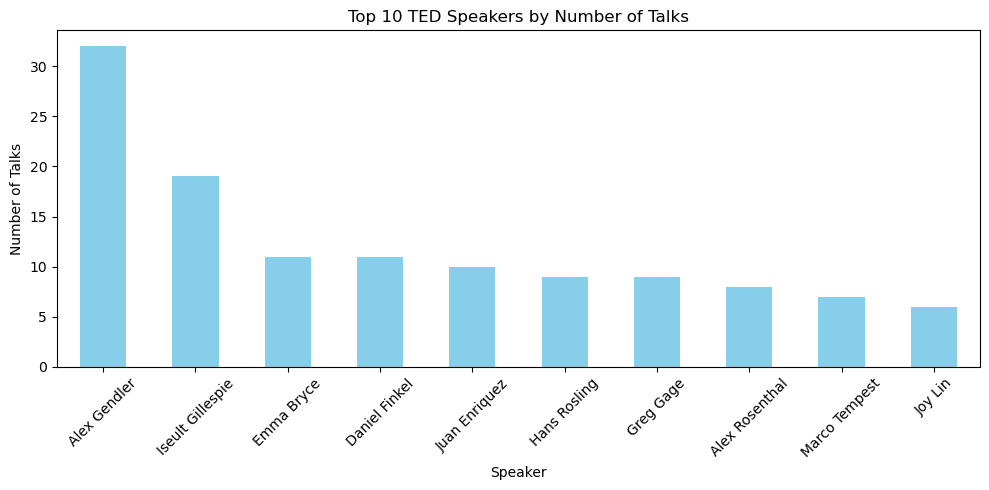

In [30]:
# Top 10 TED Speakers by Number of Talks 
top_speakers = df['main_speaker'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_speakers.plot(kind='bar', color='skyblue')
plt.title('Top 10 TED Speakers by Number of Talks')
plt.xlabel('Speaker')
plt.ylabel('Number of Talks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 15 Most Common Words in TED Talks 🔑

We visualize the 15 most common words across TED Talks to identify recurring themes and concepts.



<Figure size 1000x500 with 0 Axes>

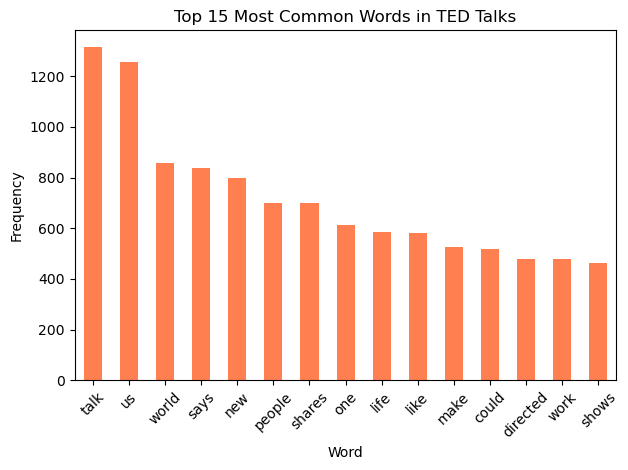

In [40]:
# Top 15 Most Common Words in TED Talks 
from collections import Counter
words = " ".join(df['details']).split()
common_words = Counter(words).most_common(15)
words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10,5))
words_df.plot.bar(x='Word', y='Frequency', legend=False, color='coral')
plt.title('Top 15 Most Common Words in TED Talks')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Word Cloud of TED Talks 🌐

We create a word cloud to visualize the most frequent words in the TED Talks, highlighting key themes in the talks.


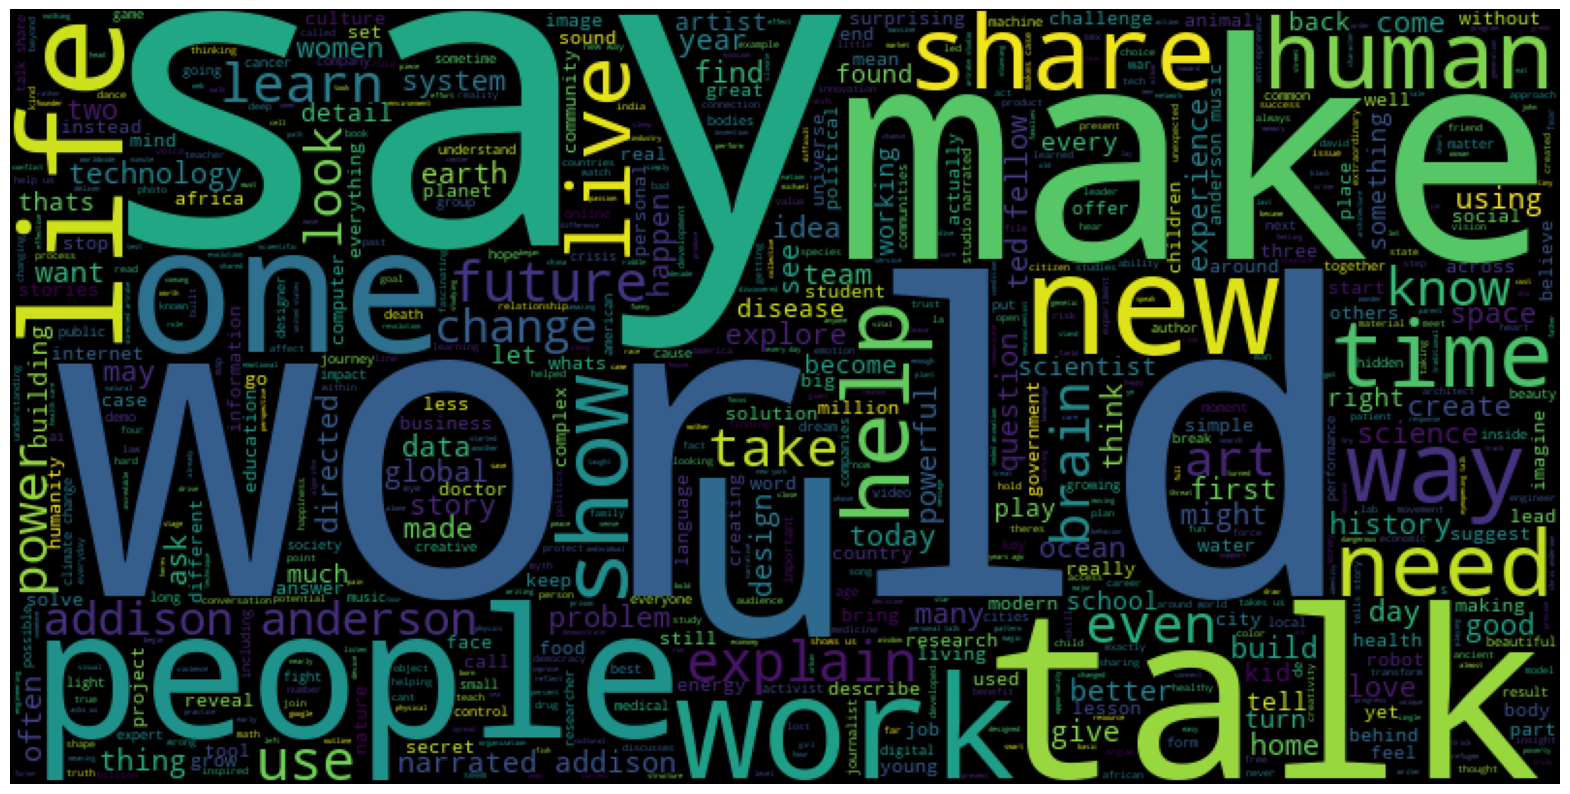

In [43]:
details_corpus = " ".join(df['details'])

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000,
			width=800,
			height=400).generate(details_corpus)
plt.axis('off')
plt.imshow(wc)
plt.show()


## Recommendation System

In [45]:
%%capture
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(df['details'])


In [46]:
def get_similarities(talk_content, data=df):

	# Getting vector for the input talk_content.
	talk_array1 = vectorizer.transform(talk_content).toarray()

	# We will store similarity for each row of the dataset.
	sim = []
	pea = []
	for idx, row in data.iterrows():
		details = row['details']

		# Getting vector for current talk.
		talk_array2 = vectorizer.transform(
			data[data['details'] == details]['details']).toarray()

		# Calculating cosine similarities
		cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]

		# Calculating pearson correlation
		pea_sim = pearsonr(talk_array1.squeeze(), talk_array2.squeeze())[0]

		sim.append(cos_sim)
		pea.append(pea_sim)

	return sim, pea


In [50]:
def recommend_talks(talk_content, data=data):

	data['cos_sim'], data['pea_sim'] = get_similarities(talk_content)

	data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[
					False, False], inplace=True)

	display(data[['main_speaker', 'details']].head())


## Testing Recommendation System

In [53]:
talk_content = ['The future of artificial intelligence and machine learning']
recommend_talks(talk_content)

,main_speaker,details
1024,Dan Finkel,Can you solve the rogue AI riddle? A hostile a...
2299,Gil Weinberg,Can robots be creative? People have been grapp...
1790,Tim Leberecht,4 ways to build a human company in the age of ...
2270,Nick Bostrom,What happens when our computers get smarter th...
1814,Zeynep Tufekci,Machine intelligence makes human morals more i...


In [54]:
talk_content = ['Time Management and working\
hard to become successful in life']
recommend_talks(talk_content)

,main_speaker,details
3343,Bjarke Ingels,Hedonistic sustainability Bjarke Ingels' archi...
4304,Robert Full,The sticky wonder of gecko feet Biologist Robe...
3552,Sam Richards,A radical experiment in empathy Can two countr...
2305,Armand D'Angour,The real story behind Archimedes' Eureka! When...
2600,Jennifer Senior,"For parents, happiness is a very high bar The ..."


In [55]:
talk_content = ['The importance of mental health and well-being']
recommend_talks(talk_content)

,main_speaker,details
4184,Paul Rothemund,"DNA folding, in detail In 2007, Paul Rothemund..."
1075,Jakob Magolan,A crash course in organic chemistry Jakob Mago...
1262,Marc Bamuthi Joseph,"What soccer can teach us about freedom ""Soccer..."
576,Leah Georges,How generational stereotypes hold us back at w...
679,Graham Worthy,The future of our coastal systems The US state...


In [56]:
talk_content = ['Climate change and impact on the health\
. How can we change this world by reducing carbon footprints?']
recommend_talks(talk_content)

,main_speaker,details
2284,Dan Ariely,How equal do we want the world to be? You'd be...
3012,Wingham Rowan,A new kind of job market Plenty of people need...
3028,Sue Austin,Deep sea diving ... in a wheelchair When Sue A...
4045,Bonnie Bassler,"How bacteria ""talk"" Bonnie Bassler discovered ..."
1437,Philipp Gerbert,The basics of AI for business On the TED@BCG s...


In [57]:
talk_content = ['How to stay motivated during difficult times']
recommend_talks(talk_content)

,main_speaker,details
943,Simona Francese,Your fingerprints reveal more than you think O...
3813,Adora Svitak,What adults can learn from kids Child prodigy ...
4405,Carl Honoré,In praise of slowness Journalist Carl Honore b...
1827,Adam de la Zerda,We can start winning the war against cancer Le...
434,Emma Lazarus,"""New Colossus"" This animation is part of the T..."
